In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.pyplot import MultipleLocator

In [2]:
colors = ['#008080', '#ffc0cb', '#bada55', '#420420', '#7fe5f0', '#FB1919', '#ffd700', '#9A32CD', '#0000CD', '#CC99CC', '#CC9900', 
                "#FF34B3","#BC8F8F","#20B2AA","#6495ED","#AB82FF","#CD5C5C","#8B008B","#FFC1C1","#00F5FF","#FFA500","#FF6A6A","#FF3030"]

- step1: Run main.py to train the model and save the predicted labels and latent representations
- step2: Import the result and draw it.

In [3]:
dataset = 'PBMC-10k'
seed = 0
y_pred = np.load('./output/{}/seed{}_label.npy'.format(dataset, seed))
z = np.load('./output/{}/seed{}_z.npy'.format(dataset, seed))
label = np.load('./input/{}/label.npy'.format(dataset))
celltype = np.load('./input/{}/cell_type.npy'.format(dataset))
n_clusters = int(max(label) - min(label) + 1)

z = TSNE(n_components=2, random_state=10, learning_rate='auto').fit_transform(z)

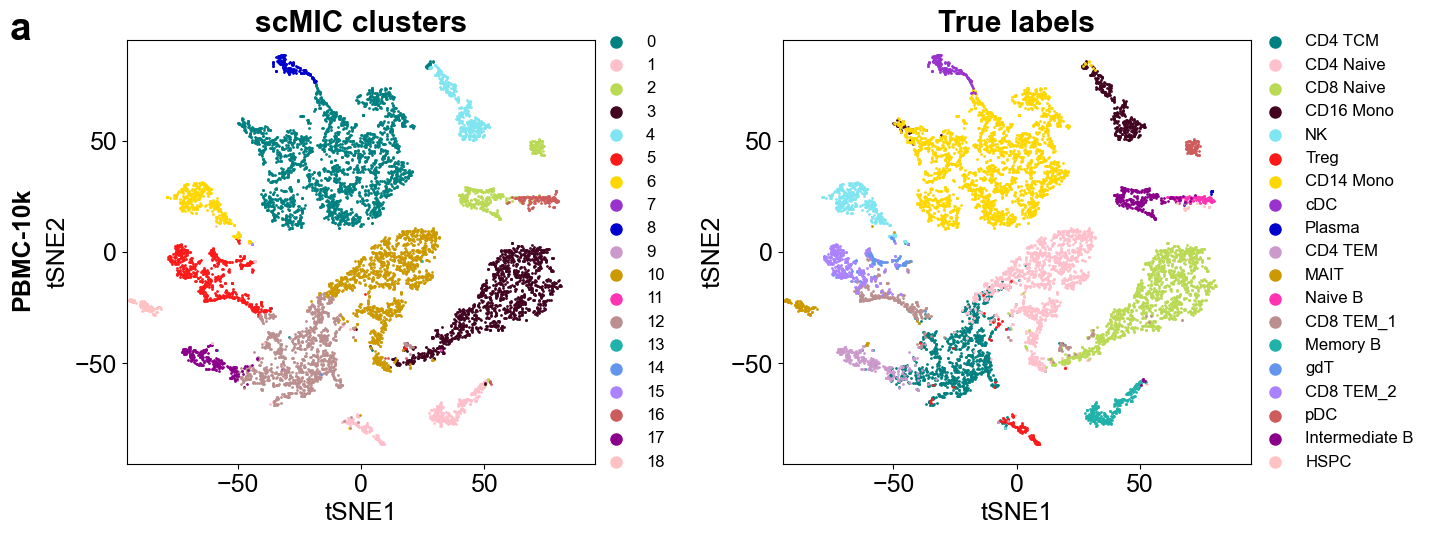

In [4]:
plt.figure(figsize=(14.5, 5.5))
plt.rcParams["legend.markerscale"] = 8
plt.rc('font',family='Times New Roman')
plt.rcParams['font.size'] = 17

ax1 = plt.subplot(121)
for j in range(n_clusters):
    ax1.scatter(z[y_pred == j, 0], z[y_pred == j, 1], s=1, color=colors[j], label=str(j))
plt.axis('on')
plt.title('scMDCL clusters', weight='bold')
plt.xlim(-95, 95)
plt.ylim(-95, 95)
x_major_locator=MultipleLocator(50)
ax1.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(50)
ax1.yaxis.set_major_locator(y_major_locator)
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.legend(loc='right', bbox_to_anchor=(1.18, 0.5), frameon=False, prop = {'size':11, 'family': 'Times New Roman'})


ax2 = plt.subplot(122)
for j in range(n_clusters):
    ax2.scatter(z[label == j, 0], z[label == j, 1], s=1, color=colors[j], label=celltype[j])
plt.axis('on')
plt.title('True labels', weight='bold')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.xlim(-95, 95)
plt.ylim(-95, 95)
x_major_locator=MultipleLocator(50)
ax2.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(50)
ax2.yaxis.set_major_locator(y_major_locator)
plt.legend(loc='right', bbox_to_anchor=(1.38, 0.5), frameon=False, prop = {'size':11, 'family': 'Times New Roman'})

plt.subplots_adjust(wspace=0.4)
 
plt.text(-0.21,0.36, 'PBMC-10k',rotation=90, rotation_mode='anchor', fontdict={'weight': 'bold', 'family': 'Times New Roman'},transform=ax1.transAxes)
#plt.text(-0.25,1, 'a', fontdict={'weight':'bold'},transform=ax1.transAxes, size = 28)


plt.savefig('./output/{}_tsne.eps'.format(dataset), format='eps', bbox_inches='tight')

plt.show()